<a href="https://colab.research.google.com/github/ekaterinakoltsov/lidar_map/blob/main/Rrs_OWT_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter
from sklearn.cluster import KMeans

# Функция для классификации спектров по оптическим типам вод (OWT)
def classify_spectrum(spectrum, wavelengths):
    max_reflectance = np.max(spectrum)
    max_wavelength = wavelengths[np.argmax(spectrum)]

    if 540 <= max_wavelength <= 580:
        if spectrum[np.where(wavelengths == 500)[0][0]] > spectrum[np.where(wavelengths == 650)[0][0]]:
            return 'C'  # Clear
        else:
            return 'M'  # Moderate
    elif 580 <= max_wavelength <= 605:
        return 'T'  # Turbid
    elif 685 <= max_wavelength <= 715:
        return 'V'  # Very Turbid
    elif max_wavelength > 700 and np.all(spectrum < 0.006):
        return 'B'  # Brown
    else:
        return 'Unknown'  # Неизвестный тип

# Чтение файлов из папки
folder_path = '/content/spectra'  # Замените на ваш путь к папке
file_list = [f"{folder_path}/150924.csv", f"{folder_path}/280723_group1.csv", f"{folder_path}/310524.csv", f"{folder_path}/180824.csv",f"{folder_path}/170824.csv", f"{folder_path}/160824.csv", f"{folder_path}/030624.csv", f"{folder_path}/100924.csv", f"{folder_path}/110924.csv"]  # Замените на свои имена файлов

# Объединение данных из всех файлов
data_all = []
for file in file_list:
    df = pd.read_csv(file, index_col=0)  # Загрузка данных, установка даты и времени как индекса
    data_all.append(df)

data_combined = pd.concat(data_all, ignore_index=True)
data_combined = data_combined.dropna()

# Фильтрация столбцов: выбор столбцов с длинами волн от 380 до 750 нм, они представлены как строки
spectral_columns = [col for col in data_combined.columns if col.isdigit() and 380 <= int(col) <= 750]
spectral_data = data_combined[spectral_columns]

# Преобразование столбцов спектров в числовые значения для расчетов (но остаются строки в исходных данных)
wavelengths = np.array([int(col) for col in spectral_columns])

# Сглаживание данных по Савицкому-Голею
window_length = 5
poly_order = 2
data_smoothed = spectral_data.apply(lambda x: savgol_filter(x, window_length=window_length, polyorder=poly_order), axis=0)

# Нормализация данных спектров
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_smoothed)

# Извлечение параметров воды
water_params = data_combined[['Chl-a(ug/L)', 'TSS(mg/L)', 'a440(1/m)']].values

# Добавление данных параметров воды к спектральным данным
data_with_params = np.hstack([data_normalized, water_params])

# Нормализация данных с новыми признаками (спектры + параметры воды)
data_with_params_normalized = scaler.fit_transform(data_with_params)

# Кластеризация K-means
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_with_params_normalized)
labels = kmeans.labels_

# Классификация спектров
final_labels = []
for i, spectrum in enumerate(data_normalized):
    owt_label = classify_spectrum(spectrum, wavelengths)
    final_labels.append(owt_label)

# Визуализация результатов
color_map = {'C': 'blue', 'M': 'green', 'T': 'yellow', 'V': 'red', 'B': 'brown', 'Unknown': 'gray'}
legend_added = {}
for label in np.unique(final_labels):
    cluster_data = data_normalized[np.array(final_labels) == label]
    if label in color_map:
        if color_map[label] not in legend_added:
            plt.plot(wavelengths, cluster_data.T, color=color_map[label], alpha=0.5, label=label)
            legend_added[color_map[label]] = True
        else:
            plt.plot(wavelengths, cluster_data.T, color=color_map[label], alpha=0.5)


ValueError: Found array with 0 sample(s) (shape=(0, 371)) while a minimum of 1 is required by StandardScaler.

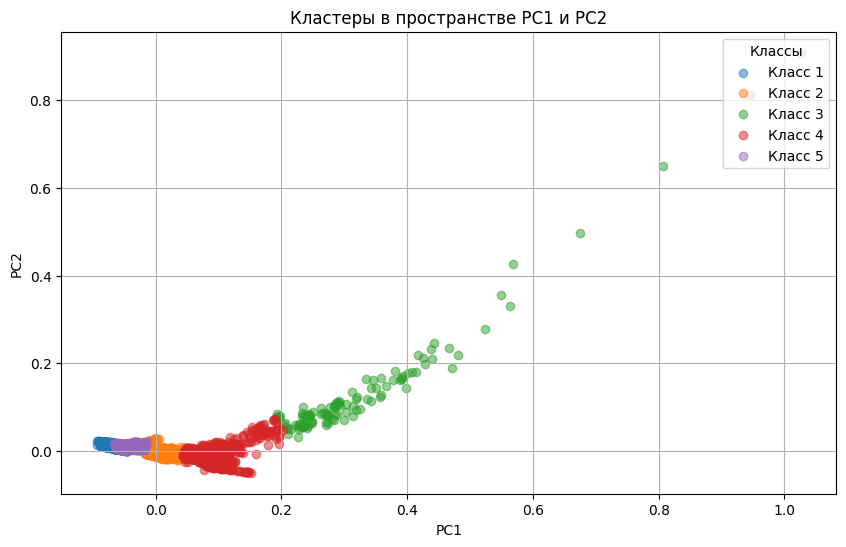

         Chl-a(ug/L)  TSS(mg/L)  a440(1/m)
Cluster                                   
0          11.175409   1.493345   0.006293
1           6.200331   2.918995   1.363952
2          63.899869   7.320908   1.478219
3           6.229074   3.012604   1.393643
4           3.155283   1.661217   0.005998


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.signal import savgol_filter

# Функция для классификации спектров по оптическим типам вод (OWT)
def classify_spectrum(spectrum, wavelengths):
    max_reflectance = np.max(spectrum)
    max_wavelength = wavelengths[np.argmax(spectrum)]

    if 540 <= max_wavelength <= 580:
        if spectrum[np.where(wavelengths == 500)[0][0]] > spectrum[np.where(wavelengths == 650)[0][0]]:
            return 'C'  # Clear
        else:
            return 'M'  # Moderate
    elif 580 <= max_wavelength <= 605:
        return 'T'  # Turbid
    elif 685 <= max_wavelength <= 715:
        return 'V'  # Very Turbid
    elif max_wavelength > 700 and np.all(spectrum < 0.006):
        return 'B'  # Brown
    else:
        return 'Unknown'  # Неизвестный тип

# Чтение файлов из папки
folder_path = '/content/spectra'  # Замените на ваш путь к папке
file_list = [f"{folder_path}/150924.csv", f"{folder_path}/280723_group1.csv", f"{folder_path}/310524.csv", f"{folder_path}/180824.csv",f"{folder_path}/170824.csv", f"{folder_path}/160824.csv", f"{folder_path}/030624.csv", f"{folder_path}/100924.csv", f"{folder_path}/110924.csv"]  # Замените на свои имена файлов


# Объединение данных из всех файлов
data_all = []
for file in file_list:
    df = pd.read_csv(file, index_col=0)  # Загрузка данных, установка даты и времени как индекса
    data_all.append(df)

data_combined = pd.concat(data_all, ignore_index=True)

# Фильтрация столбцов: выбор столбцов с длинами волн от 380 до 750 нм, они представлены как строки
spectral_columns = [col for col in data_combined.columns if col.isdigit() and 380 <= int(col) <= 750]
spectral_data = data_combined[spectral_columns]

# Преобразование столбцов спектров в числовые значения для расчетов (но остаются строки в исходных данных)
wavelengths = np.array([int(col) for col in spectral_columns])

# Сглаживание данных по Савицкому-Голею
window_length = 5
poly_order = 2
data_smoothed = spectral_data.apply(lambda x: savgol_filter(x, window_length=window_length, polyorder=poly_order), axis=0)

# Кластеризация K-means
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_smoothed)
labels = kmeans.labels_

# Добавление меток кластеров
data_combined['Cluster'] = labels

# Применение PCA для понижения размерности
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_smoothed)

# Создание DataFrame для PC1 и PC2
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Визуализация кластеров в пространстве PC1 и PC2
plt.figure(figsize=(10, 6))
for i in range(5):
    cluster_data = pca_df[pca_df['Cluster'] == i]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                label=f'Класс {i + 1}', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Кластеры в пространстве PC1 и PC2')
plt.legend(title='Классы', loc='upper right')
plt.grid(True)
plt.show()

# Расчет средних значений для каждого кластера
mean_water_params = data_combined.groupby('Cluster')[['Chl-a(ug/L)', 'TSS(mg/L)', 'a440(1/m)']].mean()
print(mean_water_params)
